<a href="https://colab.research.google.com/github/Chulika1711/AI-ML-Internship/blob/main/Clustering_using_K_Means_and_K_medoids(TASK_7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading Datasets**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/segmentation data.csv')

Mounted at /content/drive


In [ ]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.9 MB/s eta 0:00:00


In [ ]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler

In [ ]:
print(df.head())

          ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB
None


In [ ]:
print(df.isnull().sum())

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64


In [ ]:
# Implement Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Explicitly set n_init
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)


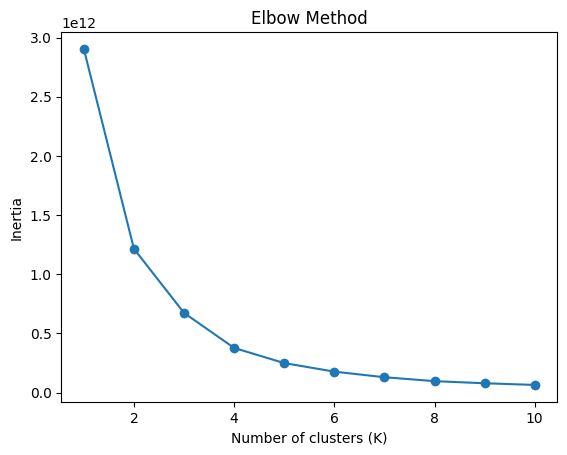

In [ ]:
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [ ]:
# Choose the optimal K value (elbow point)
optimal_k = 4
# Choose the elbow point based on the plot

# Implement K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(df)
kmeans_labels = kmeans.labels_

# Implement K-Medoids Clustering
kmedoids = KMedoids(n_clusters=optimal_k, random_state=42)
kmedoids.fit(df)
kmedoids_labels = kmedoids.labels_

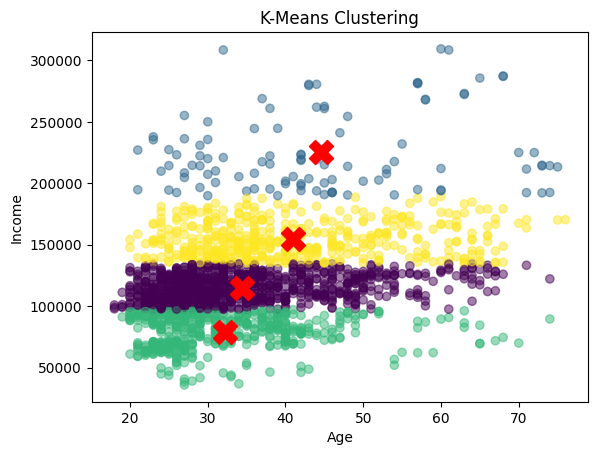

In [ ]:
# Visualize Clusters
# Choose any two features for visualization
feature1 = 'Age' # Choose feature 1
feature2 = 'Income' # Choose feature 2

plt.scatter(df[feature1], df[feature2], c=kmeans_labels, cmap='viridis', marker='o', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, df.columns.get_loc(feature1)], kmeans.cluster_centers_[:, df.columns.get_loc(feature2)], s=300, c='red', marker='X')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('K-Means Clustering')
plt.show()


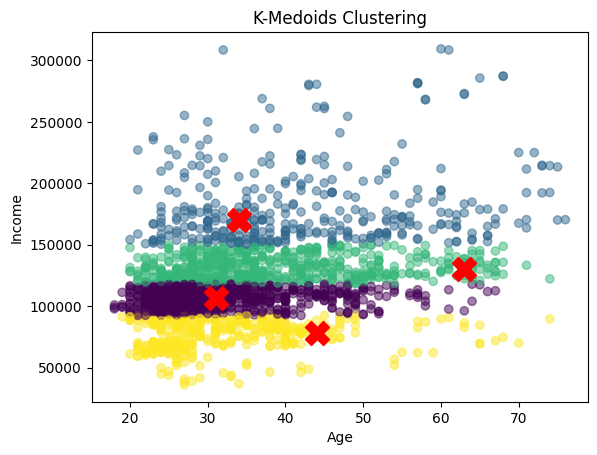

In [ ]:
plt.scatter(df[feature1], df[feature2], c=kmedoids_labels, cmap='viridis', marker='o', alpha=0.5)
plt.scatter(kmedoids.cluster_centers_[:, df.columns.get_loc(feature1)], kmedoids.cluster_centers_[:, df.columns.get_loc(feature2)], s=300, c='red', marker='X')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('K-Medoids Clustering')
plt.show()